In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\data_science_project\hourly_weather_data.csv')
nasa = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\data_science_project\Wildfire_Data_2020-2023.csv')

In [3]:
weather.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m
0,2020-01-01 00:00:00+00:00,58.700300,62.268870,45.8303,55.678288,0.0,0.004173,6.215479,239.74365
1,2020-01-01 01:00:00+00:00,54.380302,61.066536,41.2403,50.515940,0.0,0.001316,4.529580,212.90524
2,2020-01-01 02:00:00+00:00,57.080300,50.207703,38.7203,53.103203,0.0,0.000875,0.316360,224.99990
3,2020-01-01 03:00:00+00:00,50.420300,65.645630,39.3503,46.027035,0.0,0.000634,4.343468,168.11136
4,2020-01-01 04:00:00+00:00,53.120300,54.411290,37.1003,49.102360,0.0,0.000436,3.472758,194.93147


In [4]:
weather.dtypes

date                           object
temperature_2m                float64
relative_humidity_2m          float64
dew_point_2m                  float64
apparent_temperature          float64
precipitation                 float64
et0_fao_evapotranspiration    float64
wind_speed_100m               float64
wind_direction_100m           float64
dtype: object

In [5]:
nasa.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,37.45576,-121.93266,298.7,0.38,0.58,1/4/20,1042,1,VIIRS,n,2.0NRT,276.9,0.2,N
1,37.31750,-122.09219,295.9,0.37,0.58,1/4/20,1042,1,VIIRS,n,2.0NRT,280.4,0.5,N
2,37.31704,-122.09343,301.3,0.42,0.45,1/5/20,1024,1,VIIRS,n,2.0NRT,280.6,0.9,N
3,37.31878,-122.09222,296.0,0.41,0.37,1/6/20,1006,1,VIIRS,n,2.0NRT,280.0,0.8,N
4,37.45645,-121.93143,305.3,0.41,0.37,1/6/20,1006,1,VIIRS,n,2.0NRT,276.6,0.9,N


In [6]:
nasa.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
instrument     object
confidence     object
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [7]:
nasa.confidence.value_counts()

confidence
n    8666
h    1028
l     366
Name: count, dtype: int64

In [9]:
nasa[nasa.duplicated(subset=['acq_date', 'acq_time'])]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
1,37.31750,-122.09219,295.90,0.37,0.58,1/4/20,1042,1,VIIRS,n,2.0NRT,280.40,0.50,N
4,37.45645,-121.93143,305.30,0.41,0.37,1/6/20,1006,1,VIIRS,n,2.0NRT,276.60,0.90,N
6,37.45734,-121.93303,302.80,0.41,0.37,1/7/20,948,1,VIIRS,n,2.0NRT,275.90,0.60,N
7,37.31814,-122.09075,302.40,0.42,0.37,1/7/20,948,1,VIIRS,n,2.0NRT,280.10,1.00,N
8,37.18447,-121.68083,298.70,0.41,0.37,1/7/20,948,1,VIIRS,n,2.0NRT,276.20,0.80,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,37.03717,-121.52206,328.02,0.44,0.38,12/2/23,2053,1,VIIRS,n,2.0NRT,280.33,5.49,D
10048,37.18330,-121.68040,295.06,0.39,0.36,12/6/23,956,1,VIIRS,n,2.0NRT,280.88,0.63,N
10049,37.21344,-121.90060,295.62,0.39,0.36,12/6/23,956,1,VIIRS,n,2.0NRT,280.92,0.24,N
10053,37.18374,-121.67919,298.30,0.39,0.36,12/11/23,1002,1,VIIRS,n,2.0NRT,277.27,0.47,N


In [8]:
nasa.drop_duplicates(subset=['acq_date', 'acq_time'], inplace=True)

In [9]:
nasa.shape

(999, 14)

In [10]:
import pandas as pd
import numpy as np
from IPython.display import display

# Load the original dataset
weather = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\data_science_project\hourly_weather_data.csv')

# Make a copy of the original DataFrame
mastercopy = weather.copy()  # Changed the copy name to 'mastercopy'

# Define the number of NaN values to insert
num_nan_values = 50

# Insert random NaN values into the copy
for _ in range(num_nan_values):
    row_idx = np.random.choice(mastercopy.index)  # Randomly select a row index
    col_idx = np.random.choice(mastercopy.columns)  # Randomly select a column
    mastercopy.loc[row_idx, col_idx] = np.nan  # Set the selected cell to NaN

# Verify the NaN insertion by checking NaN counts
nan_counts = mastercopy.isna().sum()
print("NaN values per column:")
print(nan_counts)

# Display more rows if necessary to spot NaNs
print("\nDisplaying more rows to observe NaN values:")
display(mastercopy.head(20))  # Increase the row count displayed to 20

# Optionally, filter and display only rows with at least one NaN
print("\nRows with at least one NaN value:")
display(mastercopy[mastercopy.isna().any(axis=1)])

# Save the mastercopy DataFrame to an Excel file
output_path = r'C:\Users\HP\OneDrive\Documents\data_science_project\mastercopy_with_nans.xlsx'
mastercopy.to_excel(output_path, index=False)
output_path_csv = r'C:\Users\HP\OneDrive\Documents\data_science_project\mastercopy_with_nans.csv'
mastercopy.to_csv(output_path_csv, index=False)

print(f"\nPhysical copy of the data with NaNs has been saved to: {output_path}")
print(f"\nPhysical copy of the data with NaNs has been saved to: {output_path_csv}")



NaN values per column:
date                           1
temperature_2m                 1
relative_humidity_2m           6
dew_point_2m                   7
apparent_temperature           7
precipitation                  5
et0_fao_evapotranspiration    10
wind_speed_100m                7
wind_direction_100m            6
dtype: int64

Displaying more rows to observe NaN values:


,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m
0,2020-01-01 00:00:00+00:00,58.700300,62.268870,45.8303,55.678288,0.0,0.004173,6.215479,239.743650
1,2020-01-01 01:00:00+00:00,54.380302,61.066536,41.2403,50.515940,0.0,0.001316,4.529580,212.905240
2,2020-01-01 02:00:00+00:00,57.080300,50.207703,38.7203,53.103203,0.0,0.000875,0.316360,224.999900
3,2020-01-01 03:00:00+00:00,50.420300,65.645630,39.3503,46.027035,0.0,0.000634,4.343468,168.111360
4,2020-01-01 04:00:00+00:00,53.120300,54.411290,37.1003,49.102360,0.0,0.000436,3.472758,194.931470
5,2020-01-01 05:00:00+00:00,51.680300,57.574200,37.1903,47.492620,0.0,0.000494,2.730607,55.007900
6,2020-01-01 06:00:00+00:00,52.850300,53.604927,36.4703,48.882390,0.0,0.000297,1.140651,101.309900
7,2020-01-01 07:00:00+00:00,52.400300,53.538017,36.0203,48.481415,0.0,0.000169,1.304384,239.036300
8,2020-01-01 08:00:00+00:00,44.390300,71.234580,35.6603,38.658460,0.0,0.000617,6.487300,180.000000
9,2020-01-01 09:00:00+00:00,46.910300,62.475174,34.7603,41.930405,0.0,0.000538,5.524983,158.629320



Rows with at least one NaN value:


,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m
78,2020-01-04 06:00:00+00:00,45.830300,79.901880,39.980300,40.570736,0.000000,NaN,10.627515,139.267990
191,2020-01-08 23:00:00+00:00,54.380302,71.554510,45.380300,49.979313,0.003937,0.005342,9.650264,NaN
592,2020-01-25 16:00:00+00:00,51.860302,86.598670,NaN,50.399242,0.000000,0.000489,3.302891,61.699340
1163,2020-02-18 11:00:00+00:00,49.070297,NaN,29.360300,43.453926,0.000000,0.000924,5.538552,223.363460
2139,2020-03-30 03:00:00+00:00,55.100300,85.057250,NaN,52.994896,0.000000,0.001090,9.712290,331.073670
2756,2020-04-24 20:00:00+00:00,80.210300,25.208635,41.420300,78.267590,0.000000,0.027289,9.812248,NaN
2781,2020-04-25 21:00:00+00:00,82.010300,NaN,45.920300,80.556000,0.000000,0.026449,10.282903,315.881320
3946,2020-06-13 10:00:00+00:00,56.900300,78.110110,NaN,55.196884,0.000000,0.000187,6.803570,297.407500
3956,2020-06-13 20:00:00+00:00,70.490295,33.904580,40.700302,NaN,0.000000,0.022360,13.653032,325.007900
5655,2020-08-23 15:00:00+00:00,68.240295,66.435460,56.630302,69.708240,0.000000,NaN,1.844677,75.963730



Physical copy of the data with NaNs has been saved to: C:\Users\HP\OneDrive\Documents\data_science_project\mastercopy_with_nans.xlsx

Physical copy of the data with NaNs has been saved to: C:\Users\HP\OneDrive\Documents\data_science_project\mastercopy_with_nans.csv


In [11]:
#encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
mastercopy = pd.read_csv(r' C:\Users\HP\OneDrive\Documents\data_science_project\mastercopy_with_nans.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through all columns to apply label encoding to categorical columns
for column in weather.columns:
    if mastercopy[column].dtype == 'object':  # Check if the column is categorical (strings)
        # Apply Label Encoding
        mastercopy[column] = label_encoder.fit_transform(mastercopy[column].astype(str))

# Display the transformed DataFrame with label encoding applied
print("Data after Label Encoding:")
print(mastercopy.head(15))  # Display the first 15 rows to check the encoding


OSError: [Errno 22] Invalid argument: ' C:\\Users\\HP\\OneDrive\\Documents\\data_science_project\\mastercopy_with_nans.csv'

In [12]:
import pandas as pd

# Load the dataset
mastercopy = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\data_science_project\mastercopy_with_nans.csv')

# Create a copy for replacing NaNs
std_copy = mastercopy.copy()

# Replace NaN values with the standard deviation of the respective column
for column in std_copy.columns:
    if std_copy[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        if std_copy[column].isna().sum() > 0:  # Check if the column contains NaN values
            std_val = std_copy[column].std()  # Calculate standard deviation
            std_copy[column] = std_copy[column].fillna(std_val)  # Replace NaNs with the standard deviation

# Save the updated dataset to an Excel file
output_path_std = r'C:\Users\HP\OneDrive\Documents\data_science_project\std_copy_with_nans_replaced.xlsx'
std_copy.to_excel(output_path_std, index=False)

print(f"\nThe dataset with NaNs replaced by standard deviation has been saved to: {output_path_std}")



The dataset with NaNs replaced by standard deviation has been saved to: C:\Users\HP\OneDrive\Documents\data_science_project\std_copy_with_nans_replaced.xlsx


In [13]:
# Sanity check if weather set contains duplicate date-time
std_copy[std_copy.duplicated(subset=['date'])]

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m


In [14]:
import pandas as pd

# Step 1: Convert 'date' columns to consistent datetime format
std_copy['date'] = pd.to_datetime(std_copy['date'], errors='coerce')
nasa['acq_date'] = pd.to_datetime(nasa['acq_date'], format='%m/%d/%y', errors='coerce')

# Step 2: Clean and standardize the 'acq_time' column
try:
    # Ensure 'acq_time' is a string and pad with zeros for formats like 'HHMM'
    nasa['acq_time'] = nasa['acq_time'].astype(str).str.zfill(4)

    # Check for time strings in the format 'HH:MM:SS' and handle them
    nasa['acq_time'] = nasa['acq_time'].apply(lambda x: x if ':' in x else pd.to_datetime(x, format='%H%M').strftime('%H:%M:%S'))

    # Convert 'acq_time' to datetime.time
    nasa['acq_time'] = pd.to_datetime(nasa['acq_time'], format='%H:%M:%S', errors='coerce').dt.time
except Exception as e:
    print(f"Error processing 'acq_time': {e}")

# Step 3: Create new 'time' and 'date' components for 'standardized_copy'
try:
    std_copy['time'] = std_copy['date'].dt.time  # Extract time component
    std_copy['date'] = std_copy['date'].dt.date  # Extract date component
except Exception as e:
    print(f"Error splitting 'date': {e}")

# Step 4: Create a combined 'date_time' column for both datasets
try:
    nasa['date_time'] = pd.to_datetime(nasa['acq_date'].astype(str) + ' ' + nasa['acq_time'].astype(str), errors='coerce')
    std_copy['date_time'] = pd.to_datetime(std_copy['date'].astype(str) + ' ' + std_copy['time'].astype(str), errors='coerce')
except Exception as e:
    print(f"Error creating 'date_time': {e}")

# Step 5: Drop rows with invalid 'date_time' values
nasa = nasa.dropna(subset=['date_time'])
std_copy = std_copy.dropna(subset=['date_time'])

# Step 6: Merge datasets on 'date_time'
try:
    positive = pd.merge(nasa, std_copy, on='date_time', how='inner')
    print(f"Number of rows in merged dataset: {positive.shape[0]}")
except Exception as e:
    print(f"Error during merge: {e}")

# Sample output for verification
print("Sample from NASA dataset:")
print(nasa.head())

print("Sample from std_copy dataset:")
print(std_copy.head())

print("Sample from merged dataset:")
print(positive.head())


Number of rows in merged dataset: 43
Sample from NASA dataset:
   latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0  37.45576 -121.93266       298.7  0.38   0.58 2020-01-04  10:42:00   
2  37.31704 -122.09343       301.3  0.42   0.45 2020-01-05  10:24:00   
3  37.31878 -122.09222       296.0  0.41   0.37 2020-01-06  10:06:00   
5  37.18483 -121.67795       296.7  0.41   0.37 2020-01-07  09:48:00   
9  37.31736 -122.08982       302.0  0.39   0.36 2020-01-12  09:54:00   

   satellite instrument confidence version  bright_t31  frp daynight  \
0          1      VIIRS          n  2.0NRT       276.9  0.2        N   
2          1      VIIRS          n  2.0NRT       280.6  0.9        N   
3          1      VIIRS          n  2.0NRT       280.0  0.8        N   
5          1      VIIRS          n  2.0NRT       276.9  0.8        N   
9          1      VIIRS          n  2.0NRT       274.3  0.5        N   

            date_time  
0 2020-01-04 10:42:00  
2 2020-01-05 10:24:00  

In [15]:
# Moving the time column to the front for ease of visualization
col = std_copy.columns.to_list()
col.remove('time')
col.insert(1, 'time')
std_copy = std_copy[col]
std_copy.head()

,date,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m,date_time
0,2020-01-01,00:00:00,58.700300,62.268870,45.8303,55.678288,0.0,0.004173,6.215479,239.74365,2020-01-01 00:00:00
1,2020-01-01,01:00:00,54.380302,61.066536,41.2403,50.515940,0.0,0.001316,4.529580,212.90524,2020-01-01 01:00:00
2,2020-01-01,02:00:00,57.080300,50.207703,38.7203,53.103203,0.0,0.000875,0.316360,224.99990,2020-01-01 02:00:00
3,2020-01-01,03:00:00,50.420300,65.645630,39.3503,46.027035,0.0,0.000634,4.343468,168.11136,2020-01-01 03:00:00
4,2020-01-01,04:00:00,53.120300,54.411290,37.1003,49.102360,0.0,0.000436,3.472758,194.93147,2020-01-01 04:00:00


In [16]:
nasa.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,date_time
0,37.45576,-121.93266,298.7,0.38,0.58,2020-01-04,10:42:00,1,VIIRS,n,2.0NRT,276.9,0.2,N,2020-01-04 10:42:00
2,37.31704,-122.09343,301.3,0.42,0.45,2020-01-05,10:24:00,1,VIIRS,n,2.0NRT,280.6,0.9,N,2020-01-05 10:24:00
3,37.31878,-122.09222,296.0,0.41,0.37,2020-01-06,10:06:00,1,VIIRS,n,2.0NRT,280.0,0.8,N,2020-01-06 10:06:00
5,37.18483,-121.67795,296.7,0.41,0.37,2020-01-07,09:48:00,1,VIIRS,n,2.0NRT,276.9,0.8,N,2020-01-07 09:48:00
9,37.31736,-122.08982,302.0,0.39,0.36,2020-01-12,09:54:00,1,VIIRS,n,2.0NRT,274.3,0.5,N,2020-01-12 09:54:00


In [17]:
#time roundoff to hour
nasa['acq_time'] = pd.to_datetime(nasa['acq_time'], format='%H:%M:%S')

# Round to the nearest hour
nasa['round_time'] = nasa['acq_time'].dt.round('H')

# Convert back to time format (HH:MM:SS) 
nasa['round_time'] = nasa['round_time'].dt.time
nasa['acq_time'] = nasa['acq_time'].dt.time

C:\Users\HP\AppData\Local\Temp\ipykernel_20904\4190486836.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  nasa['round_time'] = nasa['acq_time'].dt.round('H')


In [18]:
#merge
std_copy.shape, nasa.shape

((35087, 11), (999, 16))

In [19]:
# Ensure that 'date_time' column is properly formatted
nasa['date_time'] = pd.to_datetime(nasa['acq_date'].astype(str) + ' ' + nasa['round_time'].astype(str), errors='coerce')
std_copy['date_time'] = pd.to_datetime(std_copy['date'].astype(str) + ' ' + std_copy['time'].astype(str), errors='coerce')

# Drop rows with NaT if any
nasa = nasa.dropna(subset=['date_time'])
standardized_copy = std_copy.dropna(subset=['date_time'])

# Now you can safely merge
positive = pd.merge(nasa, standardized_copy, on='date_time', how='inner')


In [20]:
positive.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,date,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m
994,36.97666,-121.54601,330.14,0.38,0.36,2023-12-12,21:03:00,1,VIIRS,n,...,2023-12-12,21:00:00,59.240300,68.296540,48.8003,55.944866,0.0,0.009498,8.276900,288.92474
995,37.09114,-122.15366,327.73,0.53,0.42,2023-12-13,20:46:00,1,VIIRS,n,...,2023-12-13,21:00:00,52.310303,86.623260,48.4403,51.354820,0.0,0.008042,1.613124,303.69010
996,37.45424,-121.93408,299.06,0.54,0.42,2023-12-23,09:38:00,1,VIIRS,n,...,2023-12-23,10:00:00,45.650300,100.000000,45.6503,43.369450,0.0,0.000000,1.500625,116.56499
997,37.45675,-121.93478,305.59,0.32,0.55,2023-12-24,09:17:00,1,VIIRS,n,...,2023-12-24,09:00:00,42.680298,82.809685,37.8203,37.939423,0.0,0.000000,5.188683,172.56868
998,37.45598,-121.93182,305.10,0.46,0.39,2023-12-28,09:43:00,1,VIIRS,n,...,2023-12-28,10:00:00,55.730300,84.812440,51.2303,52.837452,0.0,0.000342,15.350775,136.77144


In [21]:
positive.shape

(999, 26)

In [22]:
# Drop NASA features
nasa_cols = nasa.columns.to_list()
positive_only_weather = positive.drop(columns=nasa_cols)

In [23]:
positive_only_weather.head()

,date,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m
0,2020-01-04,11:00:00,41.9603,92.626236,39.9803,37.764164,0.0,0.000000,6.219504,142.30570
1,2020-01-05,10:00:00,43.9403,88.903460,40.8803,40.114570,0.0,0.000000,9.712290,298.92633
2,2020-01-06,10:00:00,46.0103,85.677090,41.9603,42.985954,0.0,0.000000,6.579214,287.81897
3,2020-01-07,10:00:00,42.3203,64.397210,31.1603,36.644592,0.0,0.000484,6.803570,207.40749
4,2020-01-12,10:00:00,41.9603,89.123010,38.9903,37.676210,0.0,0.000000,0.447400,180.00000


In [24]:
positive_only_weather.shape

(999, 10)

In [25]:
positive_only_weather.to_csv('std_copy_positive_samples.csv', index=False)

In [26]:
# Samples from different dates
nasa[~nasa['acq_date'].duplicated(keep=False)]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,date_time,round_time
0,37.45576,-121.93266,298.70,0.38,0.58,2020-01-04,10:42:00,1,VIIRS,n,2.0NRT,276.90,0.20,N,2020-01-04 11:00:00,11:00:00
2,37.31704,-122.09343,301.30,0.42,0.45,2020-01-05,10:24:00,1,VIIRS,n,2.0NRT,280.60,0.90,N,2020-01-05 10:00:00,10:00:00
3,37.31878,-122.09222,296.00,0.41,0.37,2020-01-06,10:06:00,1,VIIRS,n,2.0NRT,280.00,0.80,N,2020-01-06 10:00:00,10:00:00
5,37.18483,-121.67795,296.70,0.41,0.37,2020-01-07,09:48:00,1,VIIRS,n,2.0NRT,276.90,0.80,N,2020-01-07 10:00:00,10:00:00
9,37.31736,-122.08982,302.00,0.39,0.36,2020-01-12,09:54:00,1,VIIRS,n,2.0NRT,274.30,0.50,N,2020-01-12 10:00:00,10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,36.97666,-121.54601,330.14,0.38,0.36,2023-12-12,21:03:00,1,VIIRS,n,2.0NRT,291.13,2.34,D,2023-12-12 21:00:00,21:00:00
10056,37.09114,-122.15366,327.73,0.53,0.42,2023-12-13,20:46:00,1,VIIRS,n,2.0NRT,287.87,6.63,D,2023-12-13 21:00:00,21:00:00
10057,37.45424,-121.93408,299.06,0.54,0.42,2023-12-23,09:38:00,1,VIIRS,n,2.0NRT,278.06,1.04,N,2023-12-23 10:00:00,10:00:00
10058,37.45675,-121.93478,305.59,0.32,0.55,2023-12-24,09:17:00,1,VIIRS,n,2.0NRT,276.24,0.71,N,2023-12-24 09:00:00,09:00:00


In [29]:
# Samples from the dates
nasa[nasa['acq_date'].duplicated(keep=False)]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,round_time,date_time
27,37.21408,-121.90261,295.60,0.41,0.37,2020-02-07,10:06:00,1,VIIRS,n,2.0NRT,279.00,0.40,N,10:00:00,2020-02-07 10:00:00
30,37.14733,-121.64178,330.70,0.39,0.44,2020-02-07,21:24:00,1,VIIRS,n,2.0NRT,294.30,0.90,D,21:00:00,2020-02-07 21:00:00
33,37.45810,-121.93336,298.30,0.40,0.60,2020-02-10,09:12:00,1,VIIRS,n,2.0NRT,277.90,0.40,N,09:00:00,2020-02-10 09:00:00
34,37.14628,-121.64363,330.10,0.48,0.48,2020-02-10,20:30:00,1,VIIRS,n,2.0NRT,295.00,1.70,D,20:00:00,2020-02-10 20:00:00
39,37.45597,-121.93024,302.50,0.46,0.39,2020-02-19,09:42:00,1,VIIRS,n,2.0NRT,277.80,0.60,N,10:00:00,2020-02-19 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10024,36.97908,-122.11514,334.38,0.47,0.40,2023-11-09,21:25:00,1,VIIRS,n,2.0NRT,282.68,7.00,D,21:00:00,2023-11-09 21:00:00
10026,37.45395,-121.93423,299.02,0.38,0.58,2023-11-12,10:47:00,1,VIIRS,n,2.0NRT,275.89,0.56,N,11:00:00,2023-11-12 11:00:00
10027,37.12435,-122.16129,338.72,0.62,0.54,2023-11-12,20:25:00,1,VIIRS,n,2.0NRT,290.46,7.22,D,20:00:00,2023-11-12 20:00:00
10028,37.45317,-121.93156,296.10,0.42,0.46,2023-11-13,10:28:00,1,VIIRS,n,2.0NRT,280.62,0.59,N,10:00:00,2023-11-13 10:00:00


In [27]:
print(nasa['date_time'])

0       2020-01-04 11:00:00
2       2020-01-05 10:00:00
3       2020-01-06 10:00:00
5       2020-01-07 10:00:00
9       2020-01-12 10:00:00
                ...        
10054   2023-12-12 21:00:00
10056   2023-12-13 21:00:00
10057   2023-12-23 10:00:00
10058   2023-12-24 09:00:00
10059   2023-12-28 10:00:00
Name: date_time, Length: 999, dtype: datetime64[ns]


In [28]:
merged_df = pd.merge(std_copy, nasa, on='date_time', how='left', suffixes=('_ststd', '_nasa'))

# Filter out rows where there was a match
matched_rows = merged_df.dropna(subset=['brightness'])

# Filter out rows where there was no match
unmatched_rows = merged_df[merged_df['brightness'].isna()]

In [29]:
merged_df.columns

Index(['date', 'time', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'precipitation',
       'et0_fao_evapotranspiration', 'wind_speed_100m', 'wind_direction_100m',
       'date_time', 'latitude', 'longitude', 'brightness', 'scan', 'track',
       'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence',
       'version', 'bright_t31', 'frp', 'daynight', 'round_time'],
      dtype='object')

In [30]:
merged_df.head()

,date,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m,...,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,round_time
0,2020-01-01,00:00:00,58.700300,62.268870,45.8303,55.678288,0.0,0.004173,6.215479,239.74365,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:00:00,54.380302,61.066536,41.2403,50.515940,0.0,0.001316,4.529580,212.90524,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,02:00:00,57.080300,50.207703,38.7203,53.103203,0.0,0.000875,0.316360,224.99990,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,03:00:00,50.420300,65.645630,39.3503,46.027035,0.0,0.000634,4.343468,168.11136,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,04:00:00,53.120300,54.411290,37.1003,49.102360,0.0,0.000436,3.472758,194.93147,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
matched_rows.shape

(999, 26)

In [32]:
unmatched_rows.shape

(34095, 26)

In [33]:
unmatched = pd.merge(std_copy, nasa, on='date_time', how='left', indicator=True).query('_merge == "left_only"')

In [34]:
unmatched

,date,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m,...,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,round_time,_merge
0,2020-01-01,00:00:00,58.700300,62.268870,45.830300,55.678288,0.0,0.004173,6.215479,239.74365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2020-01-01,01:00:00,54.380302,61.066536,41.240300,50.515940,0.0,0.001316,4.529580,212.90524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2020-01-01,02:00:00,57.080300,50.207703,38.720300,53.103203,0.0,0.000875,0.316360,224.99990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2020-01-01,03:00:00,50.420300,65.645630,39.350300,46.027035,0.0,0.000634,4.343468,168.11136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2020-01-01,04:00:00,53.120300,54.411290,37.100300,49.102360,0.0,0.000436,3.472758,194.93147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35089,2024-01-01,19:00:00,50.510300,91.647210,48.170300,48.790024,0.0,0.005746,3.202897,282.09473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
35090,2024-01-01,20:00:00,53.660300,84.401740,49.070297,52.423836,0.0,0.008103,3.042649,323.97253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
35091,2024-01-01,21:00:00,55.640297,80.395310,49.700300,54.713180,0.0,0.008827,2.409323,291.80148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
35092,2024-01-01,22:00:00,56.630302,79.403760,50.330300,55.378254,0.0,0.007796,3.861661,259.99210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [35]:
std_copy['is_possible_ff'] = std_copy['date_time'].isin(nasa['date_time'].tolist())

In [36]:
std_copy[std_copy['is_possible_ff'] == True].shape

(992, 12)

In [37]:
std_copy['target'] = std_copy['is_possible_ff'].astype(int)

In [38]:
std_copy[std_copy['target'] == 1].shape

(992, 13)

In [39]:
std_copy

,date,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m,date_time,is_possible_ff,target
0,2020-01-01,00:00:00,58.700300,62.268870,45.830300,55.678288,0.0,0.004173,6.215479,239.74365,2020-01-01 00:00:00,False,0
1,2020-01-01,01:00:00,54.380302,61.066536,41.240300,50.515940,0.0,0.001316,4.529580,212.90524,2020-01-01 01:00:00,False,0
2,2020-01-01,02:00:00,57.080300,50.207703,38.720300,53.103203,0.0,0.000875,0.316360,224.99990,2020-01-01 02:00:00,False,0
3,2020-01-01,03:00:00,50.420300,65.645630,39.350300,46.027035,0.0,0.000634,4.343468,168.11136,2020-01-01 03:00:00,False,0
4,2020-01-01,04:00:00,53.120300,54.411290,37.100300,49.102360,0.0,0.000436,3.472758,194.93147,2020-01-01 04:00:00,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35083,2024-01-01,19:00:00,50.510300,91.647210,48.170300,48.790024,0.0,0.005746,3.202897,282.09473,2024-01-01 19:00:00,False,0
35084,2024-01-01,20:00:00,53.660300,84.401740,49.070297,52.423836,0.0,0.008103,3.042649,323.97253,2024-01-01 20:00:00,False,0
35085,2024-01-01,21:00:00,55.640297,80.395310,49.700300,54.713180,0.0,0.008827,2.409323,291.80148,2024-01-01 21:00:00,False,0
35086,2024-01-01,22:00:00,56.630302,79.403760,50.330300,55.378254,0.0,0.007796,3.861661,259.99210,2024-01-01 22:00:00,False,0


In [40]:
std_copy.to_csv('std_copy_features_target_v1.csv', index=False)

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('std_copy_features_target_v1.csv')

# Features (X) and target (y)
X = data.drop(columns=['target'])  # Drop target column
y = data['target']

# Ensure only numeric data in X
X = X.select_dtypes(include=['float64', 'int64'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train, predict, and compare accuracies
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
print("\nClassifier Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc * 100:.2f}%")

# Create a summary table
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
print("\nSummary Table:")
print(results_df)

# Save results to CSV
results_df.to_csv('classifier_accuracy_comparison_std.csv', index=False)
print("\nAccuracy comparison saved to 'classifier_accuracy_comparison_std.csv'.")



Classifier Accuracy Comparison:
Logistic Regression: 97.32%
Random Forest: 97.35%
Decision Tree: 94.47%
SVM: 97.34%
KNN: 97.22%
Naive Bayes: 77.04%

Summary Table:
            Classifier  Accuracy
0  Logistic Regression  0.973212
1        Random Forest  0.973497
2        Decision Tree  0.944714
3                  SVM  0.973354
4                  KNN  0.972214
5          Naive Bayes  0.770447

Accuracy comparison saved to 'classifier_accuracy_comparison_std.csv'.


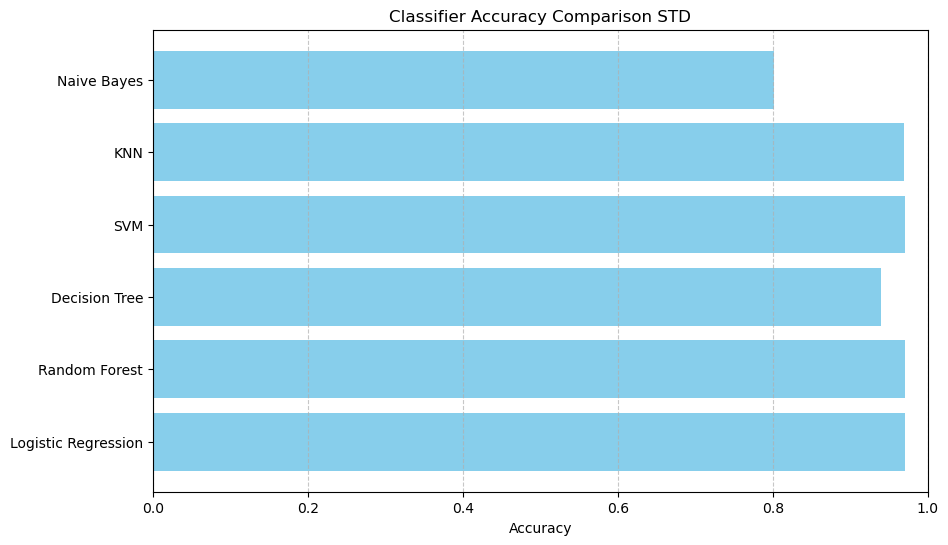

<Figure size 640x480 with 0 Axes>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `results` is a dictionary with classifier names as keys and their respective accuracy as values
results = {
    'Logistic Regression': 0.970639,  # Example accuracy, replace with actual results
    'Random Forest': 0.970639,
    'Decision Tree': 0.939852,
    'SVM':  0.970781,
    'KNN': 0.969356,
    'Naive Bayes': 0.800884

}

# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(results_df['Classifier'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison STD')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Save the plot as an image
plt.savefig('classifier_accuracy_comparison.png')


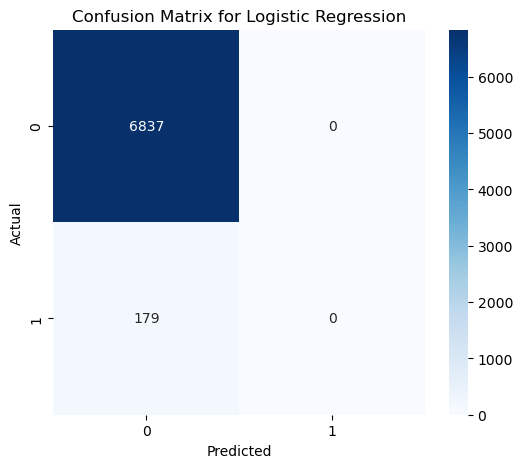

<Figure size 640x480 with 0 Axes>

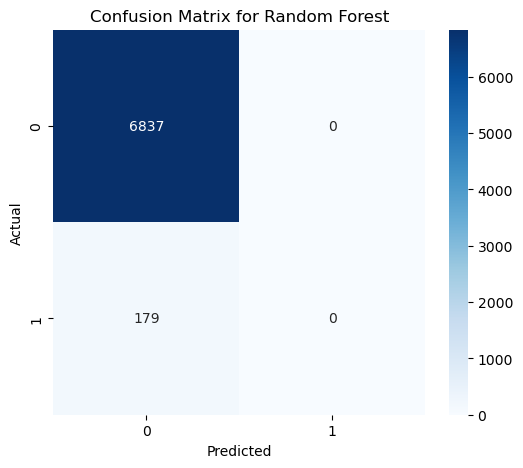

<Figure size 640x480 with 0 Axes>

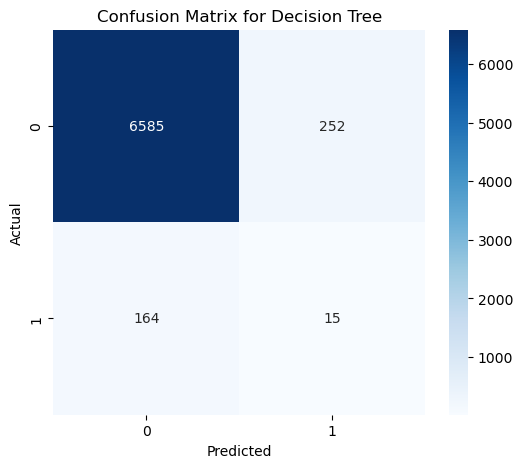

<Figure size 640x480 with 0 Axes>

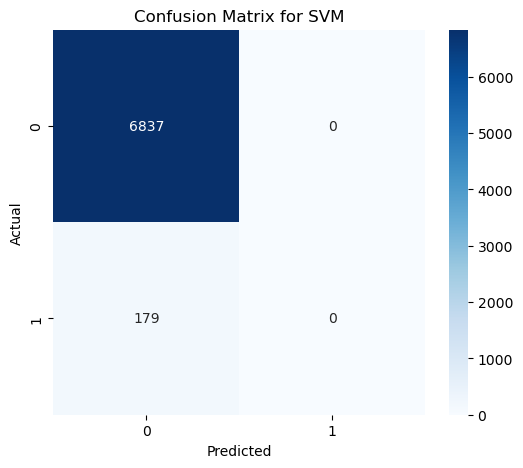

<Figure size 640x480 with 0 Axes>

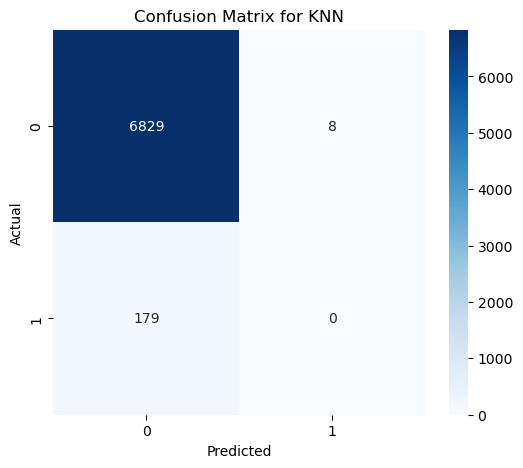

<Figure size 640x480 with 0 Axes>

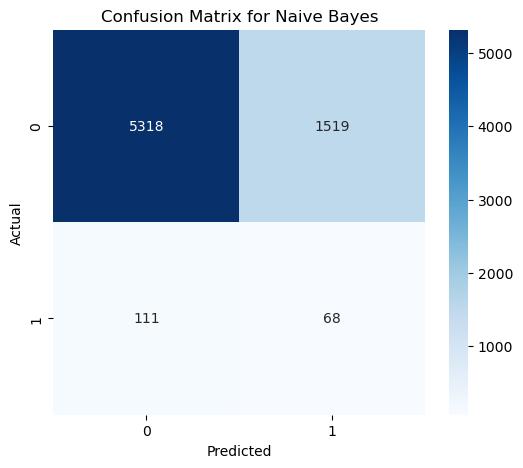


Classifier Accuracy Comparison:
Logistic Regression: 97.45%
Random Forest: 97.45%
Decision Tree: 94.07%
SVM: 97.45%
KNN: 97.33%
Naive Bayes: 76.77%

Summary Table:
            Classifier  Accuracy
0  Logistic Regression  0.974487
1        Random Forest  0.974487
2        Decision Tree  0.940707
3                  SVM  0.974487
4                  KNN  0.973347
5          Naive Bayes  0.767674

Accuracy comparison saved to 'classifier_accuracy_comparison_std.csv'.


<Figure size 640x480 with 0 Axes>

In [43]:
import pandas as pd
import numpy as np  # Import numpy for unique values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Load dataset
data = pd.read_csv('standardized_copy_features_target_v1.csv')

# Features (X) and target (y)
X = data.drop(columns=['target'])  # Drop target column
y = data['target']

# Ensure only numeric data in X
X = X.select_dtypes(include=['float64', 'int64'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train, predict, and compare accuracies
results = {}
confusion_matrices = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train classifier
    y_pred = clf.predict(X_test)  # Make predictions
    
    # Accuracy calculation
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Confusion Matrix Calculation
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Optional: Save the confusion matrix plot
    plt.savefig(f'{name}_confusion_matrix.png')

# Display accuracy comparison
print("\nClassifier Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc * 100:.2f}%")

# Create a summary table for accuracy comparison
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
print("\nSummary Table:")
print(results_df)

# Save the accuracy results to CSV
results_df.to_csv('classifier_accuracy_comparison_std.csv', index=False)
print("\nAccuracy comparison saved to 'classifier_accuracy_comparison_std.csv'.")
